# <p style="text-align: center;">Direct solver comparison in OGS</p>

## Machine: Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz

## Model: ThermoHydroMechanics point heat source bechnmark, quadratic elements (2D) 10 time steps

In [75]:
from ogs6py.ogs import OGS
import numpy as np
import matplotlib.pyplot as plt
import plot_settings

In [76]:
runs = 10

In [77]:
solvers = ["Eigen/SparseLU","Eigen/PardisoLU", "Eigen/BiCGSTAB"]

In [78]:
executables = {
    #"gcc":"/home/buchwalj/github/ogs/build_mkl_eigengcc/bin", 
    #"clang":"/home/buchwalj/github/ogs/build_mkl_eigenclang/bin", 
    "intelclang_native":"/home/buchwalj/github/ogs/build_mkl_eigenintelclang/bin",
    "intelclang":"/home/buchwalj/github/ogs/build_mkl_eigenintelclang_nomarch/bin"
}

In [79]:
def setSolver(fileobject, solver, compiler):
    if solver == "Eigen/SparseLU":
        fileobject.replace_text("SparseLU", xpath="./linear_solvers/linear_solver/eigen/solver_type")
        fileobject.replace_text("1", xpath="./linear_solvers/linear_solver/eigen/scaling")
        fileobject.write_input()
        fileobject.run_model(path=executables[compiler], logfile=f"sparselu_{compiler}.out")
        exec_time = fileobject.exec_time
    elif solver == "Eigen/PardisoLU":
        fileobject.replace_text("PardisoLU", xpath="./linear_solvers/linear_solver/eigen/solver_type")
        fileobject.replace_text("0", xpath="./linear_solvers/linear_solver/eigen/scaling")
        fileobject.write_input()
        fileobject.run_model(path=executables[compiler], logfile=f"pardisolu_{compiler}.out")
    elif solver == "Eigen/BiCGSTAB":
        fileobject.replace_text("BiCGSTAB", xpath="./linear_solvers/linear_solver/eigen/solver_type")
        fileobject.replace_text("1", xpath="./linear_solvers/linear_solver/eigen/scaling")
        fileobject.write_input()
        fileobject.run_model(path=executables[compiler], logfile=f"bicgstab_{compiler}.out")
    exec_time = fileobject.exec_time
    return exec_time

In [80]:
exec_time = {}
for compiler in executables:
    exec_time[compiler] = {}
for solver in solvers:
    for compiler in executables:
        exec_time[compiler][solver] = []
    for i in range(runs):
        for compiler in executables:
            solver_ = solver.split("/")[-1]
            m = OGS(INPUT_FILE="pointheatsource_quadratic-mesh.prj", PROJECT_FILE=f"{solver_}.prj", OMP_NUM_THREADS=4)
            exec_time[compiler][solver].append(setSolver(m, solver,compiler))

OGS finished with project file SparseLU.prj.
Execution took 7.166639089584351 s
OGS finished with project file SparseLU.prj.
Execution took 7.802980661392212 s
OGS finished with project file SparseLU.prj.
Execution took 8.65153980255127 s
OGS finished with project file SparseLU.prj.
Execution took 10.926084995269775 s
OGS finished with project file SparseLU.prj.
Execution took 10.14941668510437 s
OGS finished with project file SparseLU.prj.
Execution took 10.911795139312744 s
OGS finished with project file SparseLU.prj.
Execution took 9.919513940811157 s
OGS finished with project file SparseLU.prj.
Execution took 10.739264965057373 s
OGS finished with project file SparseLU.prj.
Execution took 10.465579271316528 s
OGS finished with project file SparseLU.prj.
Execution took 10.798503875732422 s
OGS finished with project file SparseLU.prj.
Execution took 10.029531717300415 s
OGS finished with project file SparseLU.prj.
Execution took 10.373899936676025 s
OGS finished with project file Spa

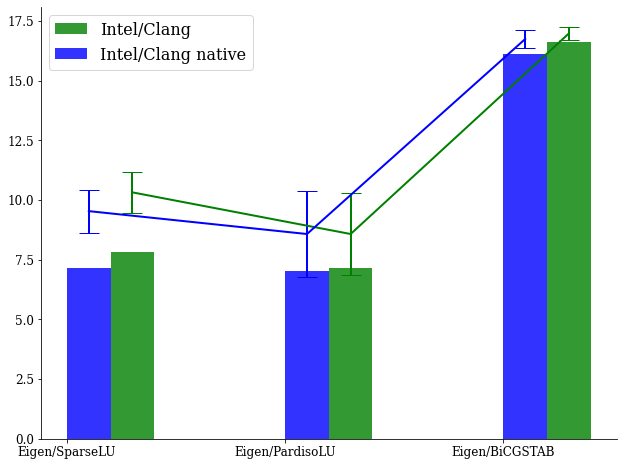

In [83]:
fig = plt.figure()
plt.rcParams.update({'font.size': 12})
ax = fig.add_axes([0,0,1,1])
slvrs_x = np.arange(len(solvers))
#ax.bar(slvrs_x,[np.min(exec_time["gcc"][solver]) for solver in solvers], color='b', alpha=0.8, width=0.2,label="GCC")
#ax.bar(slvrs_x+0.2,[np.min(exec_time["clang"][solver]) for solver in solvers], color='r', alpha=0.8,width=0.2, label="Clang")
ax.bar(slvrs_x+0.4,[np.min(exec_time["intelclang"][solver]) for solver in solvers], color='g', alpha=0.8,width=0.2, label="Intel/Clang")
ax.bar(slvrs_x+0.2,[np.min(exec_time["intelclang_native"][solver]) for solver in solvers], color='b', alpha=0.8,width=0.2, label="Intel/Clang native")

#plt.errorbar(slvrs_x, [np.mean(exec_time["gcc"][solver]) for solver in solvers], yerr=[np.std(exec_time["gcc"][solver]) for solver in solvers], color="blue", capsize=10)
#plt.errorbar(slvrs_x+0.2, [np.mean(exec_time["clang"][solver]) for solver in solvers], yerr=[np.std(exec_time["clang"][solver]) for solver in solvers], color="red", capsize=10)
plt.errorbar(slvrs_x+0.4, [np.mean(exec_time["intelclang"][solver]) for solver in solvers], yerr=[np.std(exec_time["intelclang"][solver]) for solver in solvers], color="green", capsize=10)
plt.errorbar(slvrs_x+0.2, [np.mean(exec_time["intelclang_native"][solver]) for solver in solvers], yerr=[np.std(exec_time["intelclang_native"][solver]) for solver in solvers], color="blue", capsize=10)

plt.xticks([r+0.1 for r in range(len(solvers))], solvers)
plt.legend()
plt.show()

In [87]:
[np.mean(exec_time["intelclang"][solver]) for solver in solvers]

[10.317648983001709, 8.574061369895935, 16.969620037078858]

In [88]:
[np.mean(exec_time["intelclang_native"][solver]) for solver in solvers]

[9.53214898109436, 8.573786973953247, 16.73877172470093]

In [90]:
10.317648983001709/9.53214898109436

1.0824053425376874